In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
df = pd.read_csv("df_weekly_pm.csv")
df = df.set_index('Date')
df_train, df_test = df[:"2020-01-01"], df["2020-01-01":]
df_train.shape, df_test.shape, 

((261, 1), (27, 1))

In [3]:
model = SARIMAX(df_train, order=(3,1,0),seasonal_order=(1,1,0,52))
results = model.fit()
print(results.summary())
# print(results.plot_diagnostics())
plt.show()

C:\Users\vishw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
C:\Users\vishw\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                              PM2.5   No. Observations:                  261
Model:             SARIMAX(3, 1, 0)x(1, 1, 0, 52)   Log Likelihood               -1102.356
Date:                            Fri, 20 Nov 2020   AIC                           2214.711
Time:                                    19:38:22   BIC                           2231.399
Sample:                                01-04-2015   HQIC                          2221.459
                                     - 12-29-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8131      0.040    -20.398      0.000      -0.891      -0.735
ar.L2         -0.5012      0.062   

In [4]:
start=len(df_train)
end=len(df_train)+len(df_test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(3,1,0)(1,1,0,52) Predictions')

In [5]:
test = df_test
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['PM2.5'], predictions)}, index=[0])
evaluation_results['mean_absolute_error'] = mean_absolute_error(test['PM2.5'], predictions)
evaluation_results['mean_squared_error'] = np.sqrt(mean_squared_error(test['PM2.5'], predictions))
evaluation_results['mean_absolute_percentage_error'] = np.mean(np.abs(predictions - test['PM2.5'])/np.abs(test['PM2.5']))*100 
evaluation_results

,r2_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
0,0.7797,20.048766,24.763794,30.996893


In [8]:
results.plot_predict(start, end)

AttributeError: 'SARIMAXResults' object has no attribute 'plot_predict'

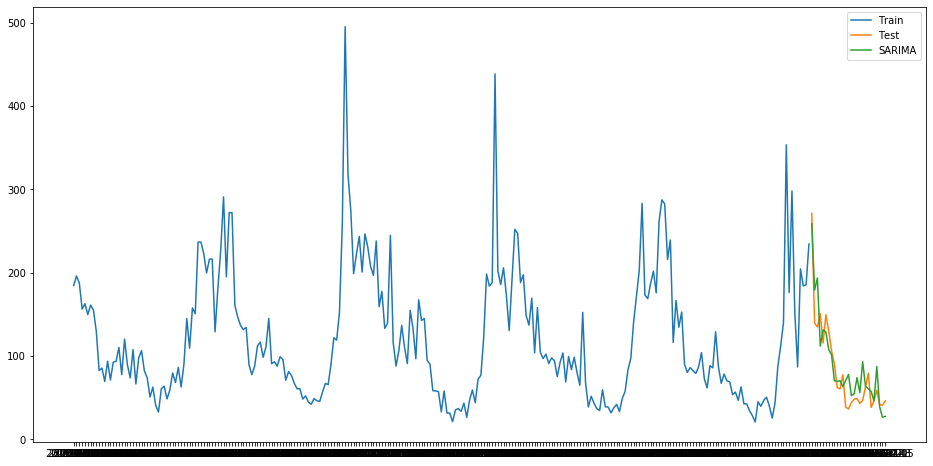

In [50]:
train = df_train
test = df_test
y_hat_avg = test.copy()
y_hat_avg['SARIMA'] = predictions
plt.figure(figsize=(16,8))
plt.plot( train['PM2.5'], label='Train')
plt.plot(test['PM2.5'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
# plt.savefig('images/pm-sarima-forecast.png')
plt.show()